# Support Vector Regression (SVR): Non-Linear Data with Sklearn

In this example, we will go through the implementation of Support Vector Regression (SVR), in which we will predict the Marks of a student based on his or her number of hours put into study. we have one independent variable Hours of Study and one dependent variable Marks. In this problem, we have to train a SVR model with this data to understand the correlation between the Hours of Study and Marks of the student and be able to predict the student’s mark based on their number of hours dedicated to studies.

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
plt.style.use("seaborn-whitegrid")

## Load data

In [2]:
# load data and store in df
url = "https://raw.githubusercontent.com/mk-gurucharan/Regression/master/SampleData.csv"
df = pd.read_csv(url)
df.head()

,Hours of Study,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


## Explore data

In [3]:
# look at descriptive statistics
df.describe()

,Hours of Study,Marks
count,100.000000,100.000000
mean,48.958341,72.035051
std,9.746379,15.200087
min,25.128485,31.707006
25%,41.526164,60.788586
50%,49.634970,72.179542
75%,56.762631,83.215080
max,70.346076,99.051415


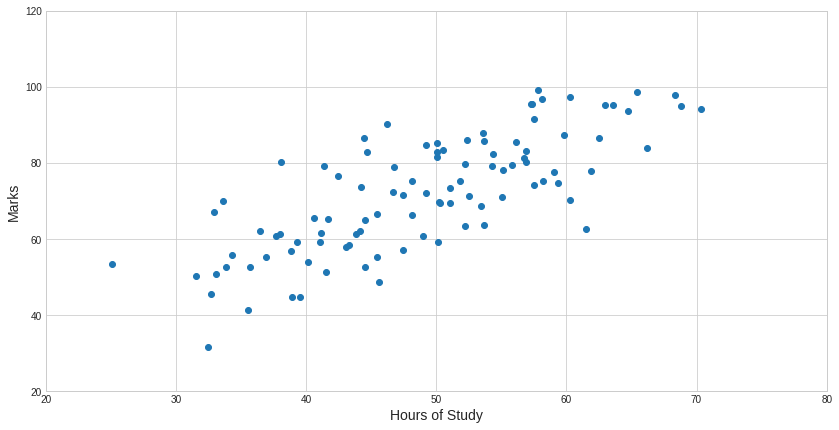

In [4]:
# plot hours of study against marks
plt.figure(figsize=(14,7))
plt.scatter(df["Hours of Study"], df["Marks"])
plt.xlabel("Hours of Study", fontsize=14)
plt.ylabel("Marks", fontsize=14)
plt.xlim(20,80)
plt.ylim(20,120)
plt.show()

## Declare targets and features

In [5]:
# create target (y) and features (X) variables
y = df[["Marks"]].values
X = df[["Hours of Study"]].values

## Feature scaling

In [6]:
# standardize features
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
# standardize targets
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

## Train-Test Split

In [7]:
# 80:20 split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
print(X_train.shape[0])
print(X_test.shape[0])
print(X_train.shape[0] / X.shape[0])

80
20
0.8


## Train SVR Model
RBF kernel is used to introduce a non-linearity to the SVR model. This is done because our data is non-linear.

In [8]:
# build and train SVR model
regressor = SVR(kernel="rbf")
regressor.fit(X_train, y_train.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Test SVR Model

In [9]:
# compute predictions and transform them back to original scale
yhat = regressor.predict(X_test)
yhat = scaler_y.inverse_transform(yhat)
yactual = scaler_y.inverse_transform(y_test).reshape(-1)

In [10]:
# compare predictions with actuals in table
eval_df = pd.DataFrame({"Actuals": yactual, "Predictions": yhat, "%-Error": np.abs(((yhat-yactual)/yactual)*100)})
eval_df

,Actuals,Predictions,%-Error
0,77.634183,83.317235,7.320297
1,65.280887,62.465455,4.312797
2,50.392670,53.281953,5.733539
3,45.570589,53.663992,17.760145
4,95.244153,88.796262,6.769854
5,60.810247,57.141287,6.033456
6,57.251819,71.822129,25.449514
7,80.207523,81.172275,1.202820
8,55.165677,68.623752,24.395740
9,31.707006,53.596328,69.036233


In [11]:
# compute mean percentage error
eval_df.loc[:, "%-Error"].mean()

16.75619364316939

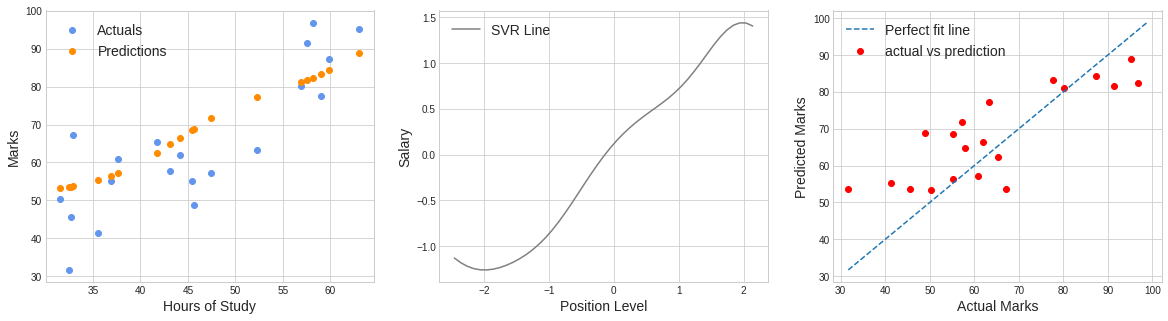

In [12]:
# plot predictions against actuals
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))


X_test_actual = scaler_X.inverse_transform(X_test)
axes[0].scatter(X_test_actual, yactual, color="cornflowerblue", label="Actuals")
axes[0].scatter(X_test_actual, yhat, color="darkorange", label="Predictions")
axes[0].set_xlabel("Hours of Study", fontsize=14)
axes[0].set_ylabel("Marks", fontsize=14)
axes[0].legend(fontsize=14)

X_grid = np.arange(min(X_scaled), max(X_scaled), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
axes[1].plot(X_grid, regressor.predict(X_grid), color = 'grey', label="SVR Line")
axes[1].set_xlabel("Position Level", fontsize=14)
axes[1].set_ylabel("Salary", fontsize=14)
axes[1].legend(fontsize=14)

axes[2].scatter(yactual, yhat, color="red", label="actual vs prediction")
axes[2].plot(np.arange(min(y), max(y)), np.arange(min(y), max(y)), linestyle="dashed", label="Perfect fit line")
axes[2].set_xlabel("Actual Marks", fontsize=14)
axes[2].set_ylabel("Predicted Marks", fontsize=14)
axes[2].legend(fontsize=14)

plt.show()